In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

from io import StringIO
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

# Data

### Metadata

In [2]:
df_meta = pd.read_csv('meta.csv', delimiter=';', index_col=0)
assert df_meta.index.nunique() == df_meta.shape[0]

# Sort index
meta_sorted_idx = df_meta.sort_values(by=['Bioreactor', 'Bioreactor_run', 'Day_Steady_state', 'Hour_Treated']).index
df_meta = df_meta.loc[meta_sorted_idx]

### Counts data

#### ASV

In [3]:
df_asv_table = pd.read_csv('asv_table.csv', delimiter=';', index_col=0)
df_asv_table

,ASV1,ASV2,ASV3,ASV4,ASV5,ASV6,ASV7,ASV8,ASV9,ASV10,...,ASV8114,ASV8115,ASV8116,ASV8117,ASV8118,ASV8119,ASV8120,ASV8121,ASV8122,ASV8123
1s1,0,53,0,34,0,0,0,0,0,37,...,0,0,0,0,0,0,0,0,0,0
1s11,0,2544,0,8416,0,0,0,0,0,343,...,0,0,0,0,0,0,0,0,0,0
1s12,0,2326,0,11906,0,0,0,0,0,422,...,0,0,0,0,0,0,0,0,0,0
1s13,0,3938,0,5967,0,0,0,0,0,106,...,0,0,0,0,0,0,0,0,0,0
1s2,0,1013,0,25,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T144-1,74,0,29,0,69,0,0,0,25,0,...,0,0,0,0,0,0,0,0,0,0
T144-2,44,0,82,0,0,0,0,457,176,0,...,0,0,0,0,0,0,0,0,0,0
T144-3,220,0,476,0,21,8,0,0,173,0,...,0,0,0,0,0,0,0,0,0,0
T144-4,76,0,68,0,16,0,0,0,26,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_asv_names = pd.read_csv('asv_names.csv', delimiter=';', index_col=0)
df_asv_names

,Kingdom,Phylum,Class,Order,Family,Genus,Species
ASV1,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
ASV2,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia-Shigella,NaN
ASV3,Bacteria,Synergistota,Synergistia,Synergistales,Synergistaceae,Pyramidobacter,NaN
ASV4,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,intestinalis
ASV5,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Muribaculaceae,NaN,NaN
...,...,...,...,...,...,...,...
ASV8119,Bacteria,Firmicutes,Bacilli,RF39,NaN,NaN,NaN
ASV8120,Bacteria,Firmicutes,Clostridia,Lachnospirales,Lachnospiraceae,NaN,NaN
ASV8121,Bacteria,NaN,NaN,NaN,NaN,NaN,NaN
ASV8122,Bacteria,Firmicutes,Bacilli,Lactobacillales,Enterococcaceae,NaN,NaN


#### OTU

In [5]:
df_otu_table = pd.read_csv('OTU_table_ydj.csv', delimiter=';', index_col=0)
df_otu_table

,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,OTU10,...,OTU7663,OTU7664,OTU7665,OTU7666,OTU7667,OTU7668,OTU7669,OTU7670,OTU7671,OTU7672
Seq_ID,,,,,,,,,,,,,,,,,,,,,
1s11,0,0,"11,53725408","42,40267895",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1s12,0,0,"7,846846506","43,78192274",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1s2,0,0,"4,418683611","0,116408789",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1s3,0,0,"4,819513471","0,320428982",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1s4,0,0,"2,024096386","2,8",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D9-1,"3,136353373","0,061577619",0,0,0,"4,739424044","23,84901168",0,"10,15620189","4,378168682",...,0,0,0,0,0,0,0,0,0,0
D9-2,"0,980681315","0,039325567",0,0,0,"0,024578479","2,944501794",0,"5,601435383","3,922725262",...,0,0,0,0,0,0,0,0,0,0
D9-3,"4,478414173",0,0,0,0,"4,90626075","31,63914689",0,"9,462074303","4,009717922",...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Read file and remove all quote signs, then parse as CSV
with open('taxa_names.csv', 'r') as f:
    content = f.read()

# Remove all quote signs
content = content.replace('"', '')

# Write to temporary string and read with pandas
df_otu_names = pd.read_csv(StringIO(content), index_col=0, na_values=['NA'])
df_otu_names

,Kingdom,Phylum,Class,Order,Family,Genus,Species
OTU1,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,NaN
OTU2,Bacteria,Synergistetes,Synergistia,Synergistales,Synergistaceae,Pyramidobacter,NaN
OTU3,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacteriales,Enterobacteriaceae,Escherichia/Shigella,NaN
OTU4,Bacteria,Bacteroidetes,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,intestinalis
OTU5,Bacteria,Firmicutes,Bacilli,Bacillales,Listeriaceae,Listeria,NaN
...,...,...,...,...,...,...,...
OTU7670,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,NaN,NaN
OTU7671,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,NaN,NaN
OTU7672,Bacteria,Firmicutes,NaN,NaN,NaN,NaN,NaN
OTU7673,Bacteria,Firmicutes,Clostridia,Clostridiales,Ruminococcaceae,Ruminococcaceae_UCG-014,NaN


# Analysis

## OTU

In [7]:
df_otu_names.nunique()

Kingdom      3
Phylum      15
Class       21
Order       42
Family      72
Genus      226
Species    104
dtype: int64

In [8]:
df_asv_names.nunique()

Kingdom      2
Phylum      13
Class       19
Order       52
Family      86
Genus      222
Species    105
dtype: int64

**Comment:** both look similar which is OK

### OTU completness wrt metadata

In [9]:
df_meta[df_meta.index.isin(df_otu_table.index)]

,Tube,Name,Sample_ID,Sequence_run,Bioreactor_run,Bioreactor,Inoculation,Sampling.date,timepoint,Day_Steady_state,Hour_Treated,Treatment,Gas,Extract,gDNA..ng.µl.,analysis
1s2,1s2,1s2,E01_R1_D1,1,1,1.0,supernatant,NaN,steady_state,1,NaN,NaN,CO2,NaN,NaN,include
1s3,1s3,1s3,E01_R1_D2,1,1,1.0,supernatant,NaN,steady_state,2,NaN,NaN,CO2,NaN,NaN,include
1s4,1s4,1s4,E01_R1_D5,1,1,1.0,supernatant,NaN,steady_state,5,NaN,NaN,CO2,NaN,NaN,include
1s5,1s5,1s5,E01_R1_D6,1,1,1.0,supernatant,NaN,steady_state,6,NaN,NaN,CO2,NaN,NaN,include
1s7,1s7,1s7,E01_R1_D8,1,1,1.0,supernatant,NaN,steady_state,8,NaN,NaN,CO2,NaN,NaN,include
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D11-4,D11:4,D11r4,E03_R4_D11,3,3,4.0,NaN,18.11.2024,steady_state,11,NaN,NaN,N2,19.01.2023,"371,7",include
D13-4,D13:4,D13r4,E03_R4_D13,3,3,4.0,NaN,18.11.2026,steady_state,13,NaN,NaN,N2,19.01.2023,"317,6",include
D15-4,D15:4,D15r4,E03_R4_D15,3,3,4.0,NaN,18.11.2028,steady_state,15,NaN,NaN,N2,19.01.2023,"253,9",include
D16-4,D16:4,D16r4,E03_R4_D16,3,3,4.0,NaN,18.11.2029,steady_state,16,NaN,NaN,N2,19.01.2024,"372,2",include


In [10]:
df_meta.Sequence_run.value_counts()

Sequence_run
3    93
1    50
2    50
4    10
Name: count, dtype: int64

In [11]:
df_meta[df_meta.index.isin(df_otu_table.index)].Sequence_run.value_counts()

Sequence_run
3    43
1    36
Name: count, dtype: int64

**Comment**: unfortunately, OTU data are incomplete when it comes to number of samples.

## ASV

### ASV completness wrt metadata

In [12]:
df_meta[df_meta.index.isin(df_asv_table.index)].Sequence_run.value_counts()


Sequence_run
3    93
1    50
2    50
4    10
Name: count, dtype: int64

**Comment**: ASV data are complete.

Now, the goal is to reduce taxonomic diversity. We can't work on species level - there are too many bacteria.

### Approach #1: Select most abundant bacteria

In [13]:
filtered = df_asv_table.loc[:, df_asv_table.sum(axis=0)>1e4]
print(f"Unique ASVs: {filtered.shape[1]}")
print(f"Total counts: {filtered.sum(axis=0).sum() / df_asv_table.sum(axis=1).sum() * 100:.1f}%")

Unique ASVs: 95
Total counts: 82.3%


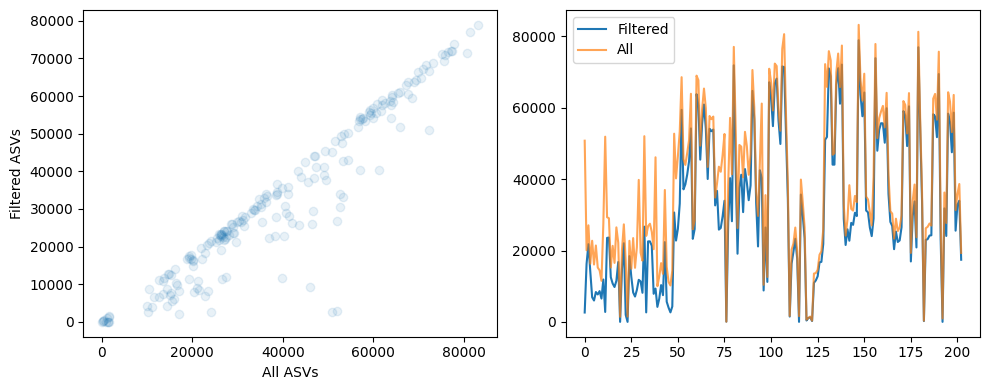

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].scatter(df_asv_table.sum(axis=1), filtered.sum(axis=1), alpha=0.1)
axs[0].set_xlabel('All ASVs')
axs[0].set_ylabel('Filtered ASVs')

axs[1].plot(filtered.sum(axis=1).sort_index(), label='Filtered')
axs[1].plot(df_asv_table.sum(axis=1).sort_index(), label='All', alpha=0.7)
axs[1].legend()

# Show less x axis labels for the right plot
xticks = axs[1].get_xticks()
n = len(xticks)
if n > 0:
    # Reduce number of labels: show every 4th if lots, or every 2nd if few, etc.
    step = max(1, n // 8)
    axs[1].set_xticks(xticks[::step])
    axs[1].set_xticklabels([str(int(label)) for label in xticks[::step]])

plt.tight_layout()
plt.show()

**Comment**: Looks reasonable but 95 is still too many.

### Approach #2: Higher taxonomic level

In [16]:
df_asv_names = df_asv_names.fillna('Unknown')

In [17]:
# Map ASV columns to Family names
asv_to_family = df_asv_names['Family'].to_dict()
df_asv_table_family = df_asv_table.copy()
# Replace columns with Family names (may result in duplicate columns for the same Family)
df_asv_table_family.columns = [asv_to_family.get(col, 'Unknown') for col in df_asv_table.columns]
# Merge columns with the same Family by summing them
df_family = df_asv_table_family.groupby(level=0, axis=1).sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_24560\4185459812.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_family = df_asv_table_family.groupby(level=0, axis=1).sum()


In [23]:
# Select main families
main_families = df_family.columns[df_family.sum(axis=0) > 2e5]
filtered_families = df_family[main_families].loc[meta_sorted_idx]

print(f"Unique families: {filtered_families.shape[1]}")
print(f"Total counts: {filtered_families.sum(axis=0).sum() / df_asv_table.sum(axis=1).sum() * 100:.1f}%")

# Calculate "Rest" as sum of all other families (not in main)
rest = df_family.drop(main_families, axis=1).loc[meta_sorted_idx].sum(axis=1)
filtered_families['Rest'] = rest

Unique families: 11
Total counts: 90.4%


In [18]:
filtered_families.sum().sort_values(ascending=False)


Bacteroidaceae        2858707
Lachnospiraceae       1122531
Rest                   753721
Enterobacteriaceae     700922
Synergistaceae         494386
Prevotellaceae         376802
Ruminococcaceae        312339
Muribaculaceae         298862
Oscillospiraceae       262211
Sutterellaceae         246884
Tannerellaceae         233196
Bifidobacteriaceae     200456
dtype: int64

**Comment**: This is probably the way to go: 10 families + one mimicking background bacteria (*Rest*).

## Plots

### Absolute values 

**Note:** we can't fully trust those data - they don't represent *true* absolute bacteria's counts

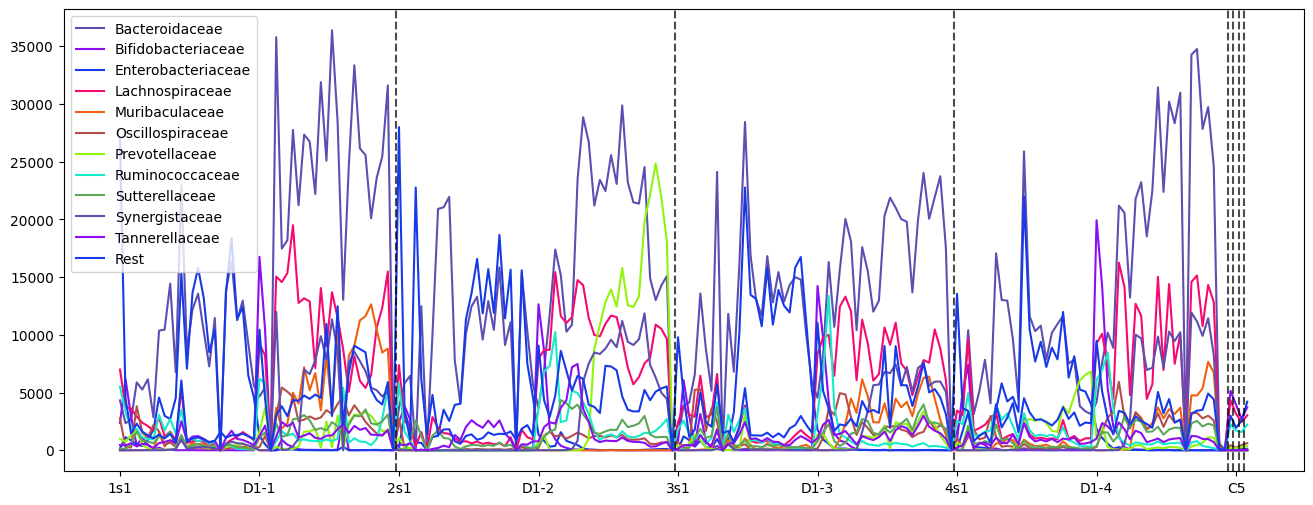

In [29]:
num_colors = max(11, filtered_families.shape[1])
color_map = plt.get_cmap('Paired')
colors = [color_map(i % 20) for i in range(filtered_families.shape[1])]
colors2 = ["#5D4EB1", "#8A0EF1", '#173AE8', '#F60971','#F0610F','#B54E4A','#91F40B','#15EACA','#5DA758']

ax = filtered_families.plot(figsize=(16,6), color=colors2)

if "Bioreactor" in df_meta.columns:
    bioreactors = df_meta.loc[filtered_families.index, "Bioreactor"]
    for idx in (bioreactors != bioreactors.shift()).to_numpy().nonzero()[0][1:]:
        ax.axvline(idx - 0.5, color="k", ls="--", alpha=0.7)

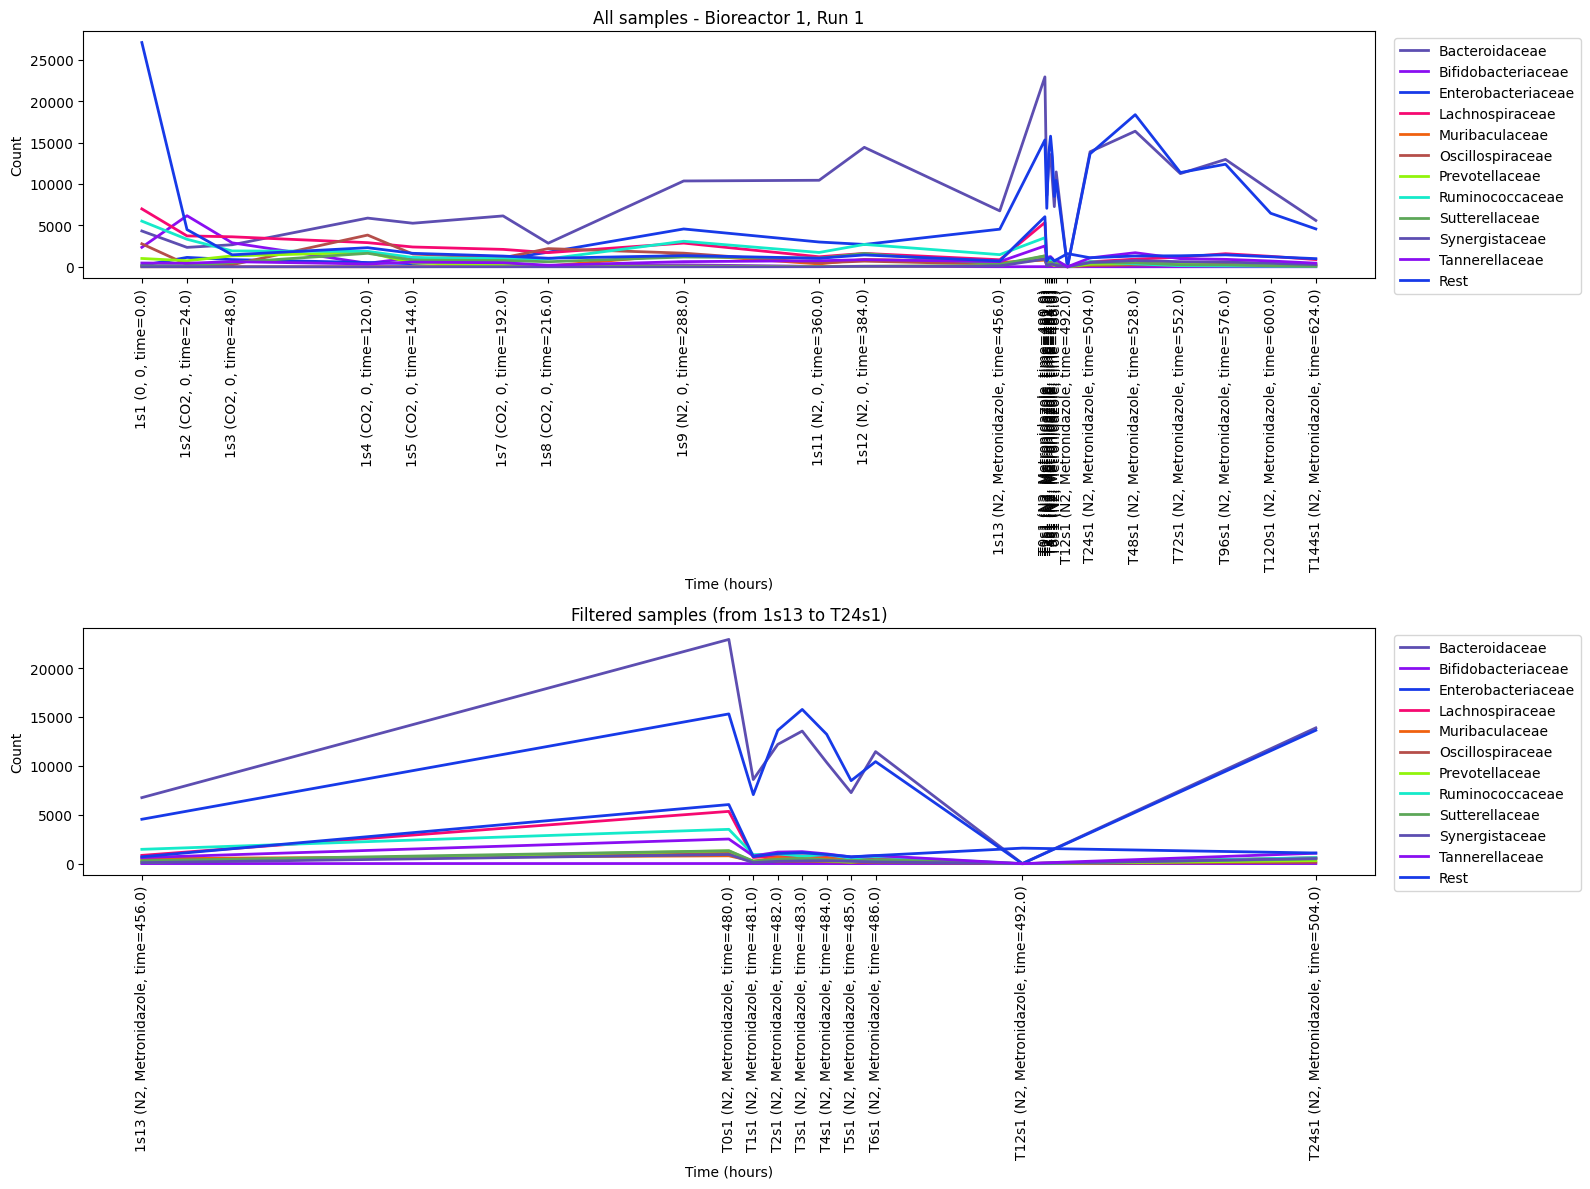

In [56]:
bio_number = 1
run_number = 3

df_meta_nona = df_meta.fillna(0)
# Get sorted index for the specified bioreactor
idx = df_meta_nona[(df_meta_nona.Bioreactor == bio_number) & (df_meta_nona.Bioreactor_run == 1)].sort_values(by=['Bioreactor_run','Day_Steady_state', 'Hour_Treated']).index

# Build new xtick labels with Gas and Treatment info
meta_filtered = df_meta_nona.loc[idx]

# Calculate time values: t = day_steady_state*24 + hours_treated%24
time = (df_meta_nona.loc[idx, 'Day_Steady_state'] * 24 + 
               df_meta_nona.loc[idx, 'Hour_Treated'] % 24)
time_values = time.values


xtick_labels = [
    f"{sample} ({meta_filtered.at[sample, 'Gas']}, {meta_filtered.at[sample, 'Treatment']}, time={time.at[sample]})" 
    for sample in idx
]

filtered_families_idx = filtered_families.loc[idx]

# Find the range from first 's13' to last 'T24*' sample in order of idx
s13_positions = [i for i, s in enumerate(idx) if 's13' in s.lower()]
t24_positions = [i for i, s in enumerate(idx) if s.startswith('T24')]

if s13_positions and t24_positions:
    start_pos = min(s13_positions)
    end_pos = max(t24_positions)
    filtered_idx = list(idx[start_pos:end_pos+1])
    
    time_filtered = (df_meta_nona.loc[filtered_idx, 'Day_Steady_state'] * 24 + 
                     df_meta_nona.loc[filtered_idx, 'Hour_Treated'] % 24).values
    xtick_labels_filtered = [
        f"{sample} ({df_meta_nona.at[sample, 'Gas']}, {df_meta_nona.at[sample, 'Treatment']}, time={time.at[sample]})" 
        for sample in filtered_idx
    ]
    filtered_families_filtered = filtered_families.loc[filtered_idx]
    
    # Create plot with 2 subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
    
    # Top plot: all samples
    for i, col in enumerate(filtered_families_idx.columns):
        color = colors2[i % len(colors2)]
        ax1.plot(time_values, filtered_families_idx[col].values, label=col, color=color, linewidth=2)
    
    ax1.set_xlabel('Time (hours)')
    ax1.set_ylabel('Count')
    ax1.set_xticks(time_values)
    ax1.set_xticklabels(xtick_labels, rotation=90)
    ax1.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    ax1.set_title('All samples - Bioreactor 1, Run 1')
    
    # Bottom plot: filtered samples (from s13 to T24)
    for i, col in enumerate(filtered_families_filtered.columns):
        color = colors2[i % len(colors2)]
        ax2.plot(time_filtered, filtered_families_filtered[col].values, label=col, color=color, linewidth=2)
    
    ax2.set_xlabel('Time (hours)')
    ax2.set_ylabel('Count')
    ax2.set_xticks(time_filtered)
    ax2.set_xticklabels(xtick_labels_filtered, rotation=90)
    ax2.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
    ax2.set_title(f"Filtered samples (from {idx[start_pos]} to {idx[end_pos]})")
    
    plt.tight_layout()
    plt.show()
else:
    print("Could not find samples with 's13' or starting with 'T24'")

### Relative abundance

**Note:** now, we show proportions - the real data we can use in our settings (e.g. for cellular automaton calibration / evaluation / testing).

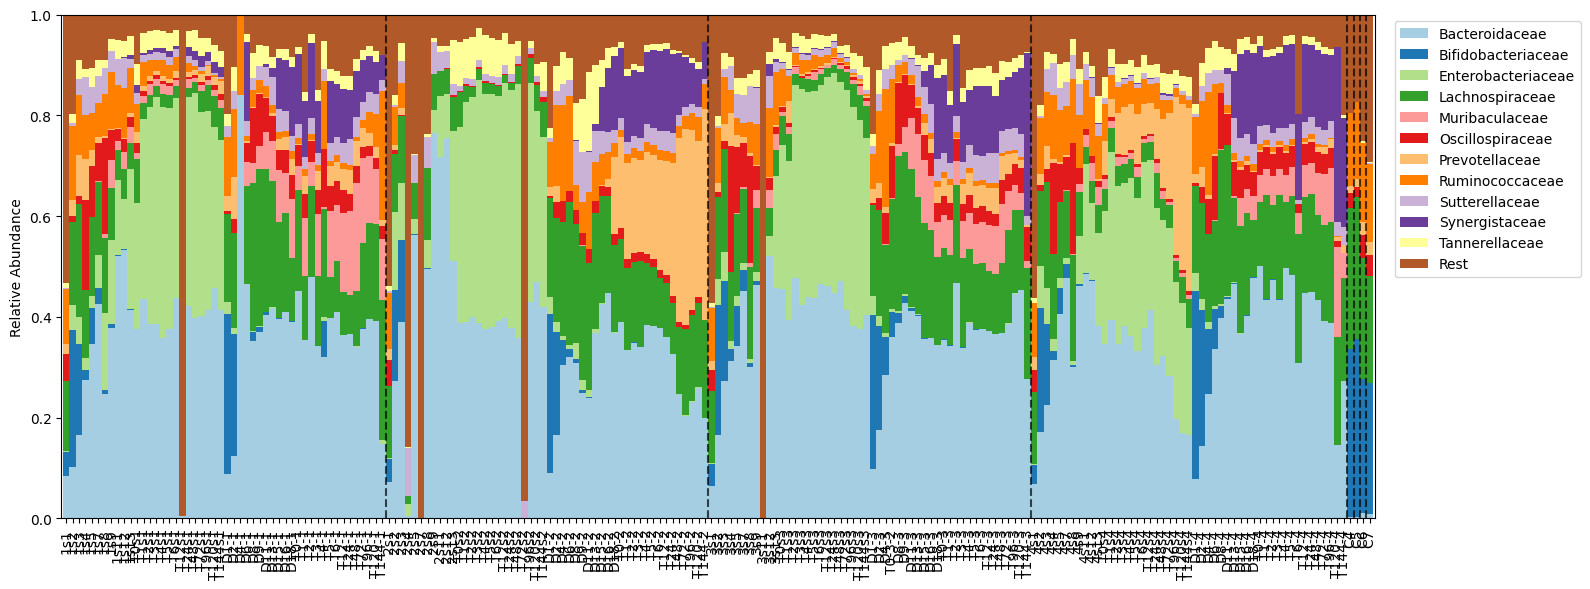

In [30]:
# Normalize data so each sample sums to 1 (relative abundance)
filtered_families_norm = filtered_families.div(filtered_families.sum(axis=1), axis=0)
ax = filtered_families_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(16,6),
    width=1,
    color=colors  # Use the same colors as in the previous plot
)
plt.ylabel('Relative Abundance')
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()

# Add vertical bioreactor lines, matching the behavior from the previous plot
if "Bioreactor" in df_meta.columns:
    bioreactors = df_meta.loc[filtered_families_norm.index, "Bioreactor"]
    for idx in (bioreactors != bioreactors.shift()).to_numpy().nonzero()[0][1:]:
        ax.axvline(idx - 0.5, color="k", ls="--", alpha=0.7)

Closer lookup at the *n*th bioreactor with `Gas` and `Treatment` information

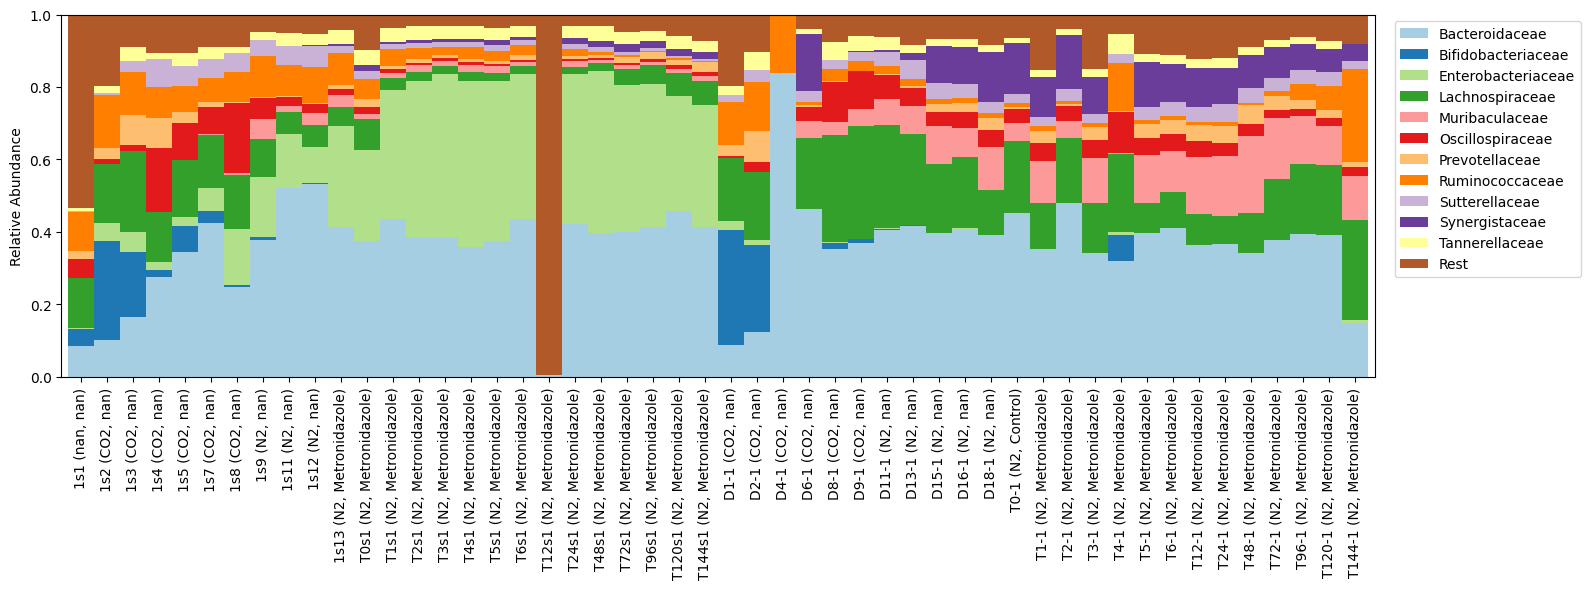

In [33]:
bio_number = 1

# Get sorted index for the specified bioreactor
idx = df_meta[df_meta.Bioreactor == bio_number].sort_values(by=['Bioreactor_run','Day_Steady_state', 'Hour_Treated']).index

# Build new xtick labels with Gas and Treatment info
meta_filtered = df_meta.loc[idx]
xtick_labels = [
    f"{sample} ({meta_filtered.at[sample, 'Gas']}, {meta_filtered.at[sample, 'Treatment']})" 
    for sample in idx
]

filtered_families_norm = filtered_families.loc[idx].div(filtered_families.loc[idx].sum(axis=1), axis=0)
ax = filtered_families_norm.plot(
    kind='bar',
    stacked=True,
    figsize=(16,6),
    width=1,
    color=colors  # Use the same colors as in the previous plot
)
ax.set_xticklabels(xtick_labels, rotation=90)
plt.ylabel('Relative Abundance')
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()

In [22]:
df_meta[df_meta.Bioreactor == bio_number].sort_values(by=['Bioreactor_run','Day_Steady_state', 'Hour_Treated'])

,Tube,Name,Sample_ID,Sequence_run,Bioreactor_run,Bioreactor,Inoculation,Sampling.date,timepoint,Day_Steady_state,Hour_Treated,Treatment,Gas,Extract,gDNA..ng.µl.,analysis
1s1,1s1,1s1,E01_R1_D0,1,1,1.0,supernatant,NaN,steady_state,0,NaN,NaN,NaN,NaN,NaN,include
1s2,1s2,1s2,E01_R1_D1,1,1,1.0,supernatant,NaN,steady_state,1,NaN,NaN,CO2,NaN,NaN,include
1s3,1s3,1s3,E01_R1_D2,1,1,1.0,supernatant,NaN,steady_state,2,NaN,NaN,CO2,NaN,NaN,include
1s4,1s4,1s4,E01_R1_D5,1,1,1.0,supernatant,NaN,steady_state,5,NaN,NaN,CO2,NaN,NaN,include
1s5,1s5,1s5,E01_R1_D6,1,1,1.0,supernatant,NaN,steady_state,6,NaN,NaN,CO2,NaN,NaN,include
1s7,1s7,1s7,E01_R1_D8,1,1,1.0,supernatant,NaN,steady_state,8,NaN,NaN,CO2,NaN,NaN,include
1s8,1s8,1s8,E01_R1_D9,1,1,1.0,supernatant,NaN,steady_state,9,NaN,NaN,CO2,NaN,NaN,include
1s9,1s9,1s9,E01_R1_D12,1,1,1.0,supernatant,NaN,steady_state,12,NaN,NaN,N2,NaN,NaN,include
1s11,1s11,1s11,E01_R1_D15,1,1,1.0,supernatant,NaN,steady_state,15,NaN,NaN,N2,NaN,NaN,include
1s12,1s12,1s12,E01_R1_D16,1,1,1.0,supernatant,NaN,steady_state,16,NaN,NaN,N2,NaN,NaN,include


### TODOs:
1. Better understand trends in the data
1. Better understand metadata structure

### Things to consider:
1. Some samples have problems: too few counts may indicate wrong sequencing (maybe we will have to interpolate such samples based on their neighborhood)
1. We will probably not be able to use those data to effectively model biofilm creation, but instead create a cellular automaton for multi species / familty interaction with the following parameters to be tuned:
   1. **Attachment rate:** How quickly cells attach to surface
   1. **Growth rate:** Cell division rate within biofilm
   1. **Treatment sensitivity:** Response to Metronidazole
   1. **Gas sensitivity:** Response to Gas type
   1. **Interaction:** How a given family behave when others are in proximity 
